DATASET IRIS FLOR

Paso 1: importanto librerias

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris                  #dataset sobre la flor iris (uso libre)
from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
import matplotlib.pyplot as plt                         #libreria para generar graficos

Cargando el dataset

In [2]:
db_iris = load_iris()

dataset

In [4]:
#imprimiento la descripcion del dataset
print(db_iris.DESCR)
#imprimiento datos del target
print(db_iris.target)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Dataframe

In [5]:
df_iris = pd.DataFrame(db_iris.data, columns=db_iris.feature_names)
df_iris['target'] = db_iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


train y test

In [6]:
#dividiremos el dataset en  75% (train) y 25% (test), estos valores estan por defecto
X_train, X_test, Y_train, Y_test = train_test_split(df_iris[db_iris.feature_names], df_iris['target'], random_state=0)
#random_state determina el nivel de entropia de los datos, es decia la incertidumbre

Se instancia el arbol de decision

In [7]:
# vamos a usar un árbol de profundidad 2 (maximo dos niveles), 
#sino se define esta valor el arbol puede crecer hasta que el algoritmo encuentre una minima ramificación
#cual es la profundidad ideal?
tree_classifier = DecisionTreeClassifier(max_depth = 4, random_state = 0)

pulir el algoritmo

In [8]:
tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

se usa datos de test 25%

In [ ]:
# Predición para un registro
#tomamos la información del primer registro (X_test)
print(X_test.iloc[0])
# el verdadero resultado de la flor
print(Y_test.iloc[0])
#le pasamos esos datos al algoritmo
tree_classifier.predict(X_test.iloc[0].values.reshape(1, -1))

#Predicciones para varios (10) registros
tree_classifier.predict(X_test[0:10])

calclular precision

In [9]:
accuracy = tree_classifier.score(X_test, Y_test)
print(accuracy)

0.9736842105263158


grafica del arbol


In [10]:
#para graficar  Iris-Setosa (0), - Iris-Versicolour (1), - Iris-Virginica (2)
class_names_list=list(['setosa','versicolor','virginica'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(tree_classifier,feature_names=db_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris.png')

True

DATASET TITANIC

In [11]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
from sklearn.metrics import accuracy_score              #clase para generar la exactitud del modelo (accuracy)
from sklearn.impute import SimpleImputer                #The SimpleImputer class provides basic strategies for imputing missing values.
import matplotlib.pyplot as plt                         #libreria para generar graficos
import seaborn as sns

In [12]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/dataset_titanic.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
print(df_titanic.info())
df_titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#Conocer valores nulos
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# Agrupando columnas por tipo de datos para facilitar el llenado de datos cuando son nulos
types = df_titanic.columns.to_series().groupby(df_titanic.dtypes).groups

# Armando lista de columnas categóricas
ctext = types[np.dtype('object')]
len(ctext)  # cantidad de columnas con datos categóricos

5

In [ ]:
# Filling values missing (cuantititaves)
for c in cnum: 
    mean = df_titanic[c].mean()
    df_titanic[c] = df_titanic[c].fillna(mean)

In [20]:
# Filling values missing (categoric)
for c in ctext:
    mode = df_titanic[c].mode()[0]
    df_titanic[c] = df_titanic[c].fillna(mode)

In [21]:
# Controlando que no hayan valores faltantes
df_titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [22]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [ ]:
# Guardando el dataset preprocesado llenando los datos nulos
df_titanic.to_csv("titanic_procesado.csv", index=False)

In [ ]:
# Se toma el archvos ya sin datos nulos y ese es el que convertimos en un dataframe
df_titanic= pd.read_csv("titanic_procesado.csv")

In [23]:
# identificando la presencia de valores nulos se evidencia que ya no hay valores nulos
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [ ]:
#Convertir todos los valores de la columna Age en INT
df_titanic[['Age']] = df_titanic[['Age']].astype('int') 
df_titanic.head()

0    0.616162
1    0.383838
Name: Survived, dtype: float64


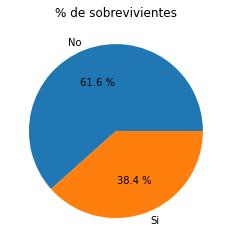

In [25]:
datos = df_titanic.Survived.value_counts(normalize=True)
print(datos)
plt.pie(datos, labels=["No","Si"], autopct="%0.1f %%")
plt.title("% de sobrevivientes")
plt.show()

In [26]:
df_titanic.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Embarked '], axis=1, inplace=True)
df_titanic.dropna(inplace=True)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_titanic['Sex'] = label_encoder.fit_transform(df_titanic['Sex'])

In [28]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [29]:
tree_classifier = DecisionTreeClassifier(max_depth = 5, random_state = 45)

In [30]:
x = df_titanic[['Pclass','Sex','Age','SibSp','Parch']]
y = df_titanic['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=45, splitter='best')

In [31]:
y_train_predict = tree_classifier.predict(x_train)
y_test_predict = tree_classifier.predict(x_test)
print("Accuracy of train: "+str(accuracy_score(y_train_predict,y_train)))
print("Accuracy of test: "+str(accuracy_score(y_test_predict,y_test)))
print("Accuracy global: "+str(tree_classifier.score(x_test,y_test)))

Accuracy of train: 0.8296593186372746
Accuracy of test: 0.8186046511627907
Accuracy global: 0.8186046511627907
